# Proyecto: Corroboración de una Factura con su XML 


## Integrantes:
## Rascon Carlos Carlos Antonio 16111750 
## Trujillo Chavez Paul Ivan 16111750

### Objetivo: 
#####  El objetivo de este proyecto es comprobar la relación entre una Factura y su XML con base en atributos que son específicos para cada factura, al mismo momento verifica si esta factura es oficial debido a los datos que corrobora son solo emitidos por el SAT.  Los parametros a revisar en cada XML y FACTURA son: 
   ######        *FOLIO FISCAL 
   ######        *NO DE SERIE DEL CERTIFICADO DEL SAT
   ######        *NO DE SERIE DEL CERTIFICADO DEL EMISOR

In [1]:
#Importamos estas librerias para agregar imagenes en los conceptos siguientes.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

### ¿Que es una factura?

La factura es un documento mercantil que registra la información de una venta, transacción o una prestación de un servicio. En ella se constata fiscalmente que se ha realizado de forma legal y satisfactoria una operación entre dos partesm dándole validez y comunicando que se han abonado los correspondientes impuestos establecidos. 

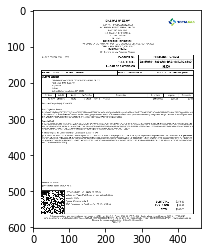

In [2]:
imagen_factura=mpimg.imread('factura_foto.png')
imgplot = plt.imshow(imagen_factura)
plt.show()

### ¿Que es el XML? 

Un XML es el conjunto de datos de un factura electronica detallados de manera legible para las plataformas electronicas, se considera que el XML es la verdadera factura ya que la impresa solo es una representación impresa, el XML es el indicado para las transacciones digitales ante la Secretaria de Hacienda, tambien es el que se presenta para declaraciones fiscales.

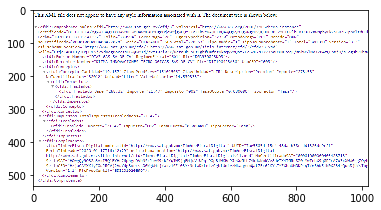

In [3]:
imagen_xml=mpimg.imread('xml_foto.png')
imgplot = plt.imshow(imagen_xml)
plt.show()

### Folio Fiscal

El folio fiscal es un numero consecutivo unico, contenido en los comprobantes fiscales digitales y de representación impresa. tambien es conocido como UUID que es Identificador Universal Unico por sus siglas en ingles. Este consta de 5 grupos de numeros y 32 digitos hexadecimales.  

<function matplotlib.pyplot.show(*args, **kw)>

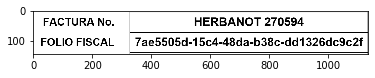

In [4]:
imagen_folio=mpimg.imread('folio_fiscal.png')
imgplot = plt.imshow(imagen_folio)
plt.show

### No. de Serie de Certificado del SAT y Emisor

Este numero de serie del certificado es el que identifica al sello digital del SAT y el misor, el sello digital es un archivo emitido por el SAT que se usa especificamente para generar los Comprobantes Fiscales en este caso las Facturas. En otras palabras el sello que identifica al emisor de una factura y este genera un numero de Serie Unico e intrasferible.

## El codigo

Este proyecto esta basado en el Procesamiento de Lenguaje Natural (PLN), para esto importaremos desde xml.dom.minidom el objeto parse. 

XML.DOM Es un modelo de objeto de documento, que es una intefaz de programacion para documentos HTML y XML. En este caso lo usaremos para XML. El DOM da una representación del documento como un grupo de nodos y objetos estructurados que tienen propiedades y metodos, para despues ser explorados.


Importamos la libreria, despues traemos con ayuda de Parse el documento XML para poder acceder a sus nodos y objetos que encontrmaos en el XML

In [6]:
from xml.dom.minidom import parse
xml = parse("CFDI_FACTURA.xml")
print(xml)

Con el siguiente codigo accedemos a nuestro XML para sacar su nodo principal con ayuda de ChildNodes, accediendo al XML para poder ir explorando dentro de el. Podmeos notar que el nodo raiz es cfdi:Comprobante 

In [7]:
xml.childNodes

[<DOM Element: cfdi:Comprobante at 0x22db577fe08>]

Ahora para poder seguir navegando en la estructura del XML tenemos que desglosar el nodo raiz y esto lo hacemos con ayuda de getElementsByTagName que lo que hace de manera simplificada es entrar al nodo que le indiquemos y lo guardamos en la posicion 0 para que los items que se encuentran dentro tomen las posiciones siguientes, ya que DOM se encargara de sacarlos en manera de lista.

In [8]:
raiz = xml.getElementsByTagName("cfdi:Comprobante")[0]

ahora podemos sacar los nodos que tenemos dentro de cfdi:Comprobante

In [9]:
raiz.childNodes

[<DOM Element: cfdi:Emisor at 0x22db814b728>,
 <DOM Element: cfdi:Receptor at 0x22db814b868>,
 <DOM Element: cfdi:Conceptos at 0x22db814b7c8>,
 <DOM Element: cfdi:Impuestos at 0x22db814bd68>,
 <DOM Element: cfdi:Complemento at 0x22db814b908>]

En esta seccion con ayuda del metodo Atributes de XML.DOM.MINIDOM y con items traemos todos los items que teniamos en el nodo, en este caso cfdi:Comprobante contenia nodos adicionales pero a su vez contenia elementos que pertenecen a el. Con el siguiente codigo podemos verlos.

In [10]:
raiz.attributes.items()

[('xmlns:cfdi', 'http://www.sat.gob.mx/cfd/3'),
 ('xmlns:xsi', 'http://www.w3.org/2001/XMLSchema-instance'),
 ('Certificado',
  'MIIGETCCA/mgAwIBAgIUMDAwMDEwMDAwMDA0MDg0MjcwMjgwDQYJKoZIhvcNAQELBQAwggGyMTgwNgYDVQQDDC9BLkMuIGRlbCBTZXJ2aWNpbyBkZSBBZG1pbmlzdHJhY2nDs24gVHJpYnV0YXJpYTEvMC0GA1UECgwmU2VydmljaW8gZGUgQWRtaW5pc3RyYWNpw7NuIFRyaWJ1dGFyaWExODA2BgNVBAsML0FkbWluaXN0cmFjacOzbiBkZSBTZWd1cmlkYWQgZGUgbGEgSW5mb3JtYWNpw7NuMR8wHQYJKoZIhvcNAQkBFhBhY29kc0BzYXQuZ29iLm14MSYwJAYDVQQJDB1Bdi4gSGlkYWxnbyA3NywgQ29sLiBHdWVycmVybzEOMAwGA1UEEQwFMDYzMDAxCzAJBgNVBAYTAk1YMRkwFwYDVQQIDBBEaXN0cml0byBGZWRlcmFsMRQwEgYDVQQHDAtDdWF1aHTDqW1vYzEVMBMGA1UELRMMU0FUOTcwNzAxTk4zMV0wWwYJKoZIhvcNAQkCDE5SZXNwb25zYWJsZTogQWRtaW5pc3RyYWNpw7NuIENlbnRyYWwgZGUgU2VydmljaW9zIFRyaWJ1dGFyaW9zIGFsIENvbnRyaWJ1eWVudGUwHhcNMTcxMjA2MDEzNTIwWhcNMjExMjA2MDEzNTIwWjCBsTEaMBgGA1UEAxMRRElBWiBHQVMgU0EgREUgQ1YxGjAYBgNVBCkTEURJQVogR0FTIFNBIERFIENWMRowGAYDVQQKExFESUFaIEdBUyBTQSBERSBDVjElMCMGA1UELRMcREdBOTMwODIzS0QzIC8gTkFDUzYwMTEyODhEMTEeMBwGA1U

Como dato informativo las libreria xml.dom nos proporciona varias funciones como la de itmes, ahora solo mostraremos la funcion length que nos ayuda a contar cuantos items tenemos dentro del nodo. 

In [33]:
raiz.attributes.length

18

De estos elementos utilizaremos el No de certificado del emisor, lo obtendremos con ayuda de attributes pero esta vez le definiremos un valor a buscar y pediremos que nos regrese su valor (value)

In [12]:
certificado_emisor = raiz.attributes["NoCertificado"].value
print("NO. DE CERTIFICADO DEL EMISOR: ", certificado_emisor)

NO. DE CERTIFICADO DEL EMISOR:  00001000000408427028


Para seguir navegando dentro del XML ahora utilizaremos un nodo hijo de cfdi:Comprobante para acceder al nodo hijo utilizaremos de nuevo la libreria xml.getElementsByTagName ahora como los tenemos en una lista, ahora buscamos cfdi:Complemento y lo asignamos de nuevo el valor de 0 en el arreglo para que los datos que obtengamos tomen su lugar correspondiente. 

In [34]:
complemento = xml.getElementsByTagName("cfdi:Complemento")[0]

Obtenemos sus nodos

In [14]:
complemento.childNodes

[<DOM Element: tfd:TimbreFiscalDigital at 0x22db814be08>]

Para obtener los valores que requerimos sabemos que se encuentran dentro del nodo obtenido tfd:TimbreFiscalDigital. Para navegar dentro de el necesitaremos accesar a el y traer sus datos en una nueva lista.

In [15]:
tfd = xml.getElementsByTagName("tfd:TimbreFiscalDigital")[0]

Sabemos de antemano que este nodo ya no cuenta con mas nodos hijos por eso el siguiente codigo solo sera demostrativo.

In [16]:
tfd.childNodes

[]

Ahora obtenemos sus items dentro de este nodo y que nos regrese la lista 

In [17]:
tfd.attributes.items()

[('xmlns:tfd', 'http://www.sat.gob.mx/TimbreFiscalDigital'),
 ('UUID', '7ae5505d-15c4-48da-b38c-dd1326dc9c2f'),
 ('FechaTimbrado', '2020-01-17T16:42:29'),
 ('xsi:schemaLocation',
  'http://www.sat.gob.mx/TimbreFiscalDigital http://www.sat.gob.mx/sitio_internet/cfd/TimbreFiscalDigital/TimbreFiscalDigitalv11.xsd'),
 ('NoCertificadoSAT', '00001000000405428713'),
 ('SelloSAT',
  'HOwgQy9O32aSAxI5Q1BYHc76pngeDVbNScJ+wM9kk2YqTWSjqEMjuVlWPqt9OpBlWKHePJrXuGth74kdWKwkVv8deTX4TGRc8Z0LMwTehX9q8RCcA7u3xXWW0hgZOyhZ6L6gL9OnfUp2oVf+SfUUK5OsBLcjwsljhcWGUV9hk18fppx/37fsSq+FhBXFBNKbuhwN7NW3ZUSLAYF6U7M23MzuFR90gCam1fq3Vkw2/rsxluUjXOEgNQpDmJCq+/n7G9lrtSOyBAFSvJkQI3Ab4X+kR0XVCvEJJAHn/uJRHr6Ijpj3fWAcgHY0lpzaWWapga6DUfGoIpOVuWX4OTOBjQ=='),
 ('SelloCFD',
  'HzjaCAMXK1yTOqJRCVj2VdVdg8orcssOGWgWM+j/axz10Zi03Y/NctaDkLnLzCgbfUmfrzNkaqyxmQat7Fc62KYsTYZXhaUMOKPcqT/mShW5lN0X2B4zQun8jU/sTogsbRObmw5i7Wnp8zkM2F4FL8Hh0DYM4W1E1SitaTzWUfE1/bhel+jgxojbSNvkl4i1RI/8R17YIEdmn059uipsYipGx/vYOy8axMNANXzlwh43g+sWjSFneiCMPgclT/M+

Obtendremos de este nodo lo que es el No. de certificado de SAT y el UUID o Folio Fiscal

In [18]:
NCertificado = tfd.attributes["NoCertificadoSAT"].value
print("No. DE CERTIFICADO DEL SAT: ", NCertificado)

No. DE CERTIFICADO DEL SAT:  00001000000405428713


In [19]:
Folio = tfd.attributes["UUID"].value
print(Folio)

7ae5505d-15c4-48da-b38c-dd1326dc9c2f


Esta seccion del codigo solo sera para personalizar la interaccion con el algoritmo.

In [20]:
receptor = xml.getElementsByTagName("cfdi:Receptor")[0]
Nombre = receptor.attributes["Nombre"].value
print(Nombre)

DITMA INNOVACIONES TECNOLOGICAS SAS DE CV


Con el siguiente codigo identificamos si el XML es autentico, si obtenemos los valores solicitados se concidera un documento autentico ya que estos datos son solo proporcionados por la SECRETARIA DE HACIENDA, ademas de que se consideraran la longitud de los caracteres que se proporcionan para el folio es de 32 pero se consideran los (-) que se incluyen dando un total de 36 caracteres y para los certificados sera de 20 la cual es la longitud maxima de un numero de certificado, en caso de faltar un valor se considera como falso o no autentico.

In [21]:
if(len(Folio)==36):
    if(len(NCertificado)==20):
        if(len(certificado_emisor)==20):
            print("FELICIDADES", Nombre, "ESTE XML ES AUTENTICO VALIDADO POR SECRETARIA DE HACIENDA")
        else:
            print("XML NO ES AUTENTICO FALTA CERTIFICADO DEL EMISOR")
    else:
        print("XML NO ES AUTENTICO FALTA CERTIFICADO EMISOR")
else:
    print("XML NO ES AUTENTICO FALTA FOLIO FISCAL")

FELICIDADES DITMA INNOVACIONES TECNOLOGICAS SAS DE CV ESTE XML ES AUTENTICO VALIDADO POR SECRETARIA DE HACIENDA


### Comparar los datos con el PDF 
Ahora compararemos los datos obtenidos con anterioridad con el pdf cargado para saber si el pdf es correspondiente a su xml, pero antes de coprarlo necesitamos interpretar el PDF a un texto y un lenguaje reconocido para python con ayuda del PLN. 

Para interpretar el PDF utilizaremos la libreria fitz que viene de PyMuPDF la cual se encarga de hacer esta traduccion.

#### Libreria MuPDF

La libreria MuPDF se destaca entre todos los productos similares por su capacidad de renderizado superior y su velocidad de procesamiento sin igual. Al mismo tiempo, su "peso ligero" lo convierte en una excelente opción para plataformas donde los recursos suelen ser limitados, como los teléfonos inteligentes.

In [37]:
#Importamos la libreria FITZ
import fitz
#Abrimos el PDF que requerimos 
doc = fitz.open("factura.pdf")
#Cargamos la pagina que queremos en este caso se guardo en la posicion 0
page = doc.loadPage(0)
#Aqui convertimos el docuemnto en formato TXT para mejorar su interpretación 
text = page.getText("text")
print(text)

DIAZ GAS SA DE CV
E06410  /  RFC DGA930823KD3
AV. RAFAEL PEREZ SERNA,  No. 755
PARTIDO ROMERO
CD. JUÁREZ,  CHIHUAHUA
C.P. 32330, MÉXICO
TEL/FAX:    
DIRECCIÓN DE EXPEDICIÓN:
PASEO DE LA VICTORIA No. 4420  COL. BOSQUES DEL SOL  CD. JUAREZ
, CHIHUAHUA, MEXICO, C.P. 32617
RÉGIMEN FISCAL:
601 General de Ley Personas Morales
CLAVE PEMEX: 0000110530
FACTURA No.    
HERBANOT 270594
FOLIO FISCAL    7ae5505d-15c4-48da-b38c-dd1326dc9c2f
LUGAR DE EXPEDICION    
32330
FECHA:     2020-01-17     HORA:     15:41:32
R.F.C.:     DIT190423A30
USO CFDI:     G03 Gastos en general
CLIENTE: 20001005            
                  DITMA INNOVACIONES TECNOLOGICAS SAS DE CV
                  Río Lerma  1370  Calle Río
                  Magisterial
                  Juárez
                  Juárez,Chihuahua,México,C.P. 32350
Cantidad
U.de M.
No. Id.
CveProdSer
Descripción
P. Unitario
Importe
Descuento
19.1570
LTR Litro
32012
15101506
$14.539333
$278.53
$0.00
32012      Premium
Factura s/Despacho(s) : 7146452-0
S

Una vez extraido nuestro PDF ahora si podemos utilizar los datos obtenidos del XML para comparar y buscarlos dentro del PDF

In [38]:
if text.find(Folio) >= 0:
    if text.find(NCertificado) >=0:
        if text.find(certificado_emisor) >=0:
            print("ESTA FACTURA CORRESPONDE AL XML ANTERIOR " "\n" "FELICIDADES", Nombre, "ESTA FACTURA ES AUTENTICA")
        else:
            print("ESTA FACTURA NO CORRESPONDE AL XML EL CERTIFICADO EMISOR NO CORRESPONDE")
    else:
        print("ESTA FACTURA NO CORRESPONDE AL XML EL CERTIFICADO DEL SAT NO CORRESPONDE")
else:
    print("ESTA FACTURA NO CORRESPONDE AL XML EL FOLIO FISCAL NO CORRESPONDE")

ESTA FACTURA CORRESPONDE AL XML ANTERIOR 
FELICIDADES DITMA INNOVACIONES TECNOLOGICAS SAS DE CV ESTA FACTURA ES AUTENTICA


### NOTA: Este proyecto solo funciona con FACTURAS y XML que tienen representación en CFDI en su versión 3.3 y el XML en version 1.1